# Visualising trained convolutional filters

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from keras import backend as K
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=False)

In [3]:
model.layers

In [4]:
for layer in model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [5]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

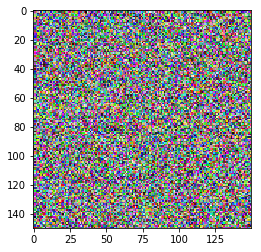

In [6]:
plt.imshow(input_img_data.squeeze()); #start with random noise

In [7]:
def deprocess(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [8]:
def gen_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data]) 
        input_img_data += grads_value * step #gradient ascent
    
    img = input_img_data[0]
    return deprocess(img)

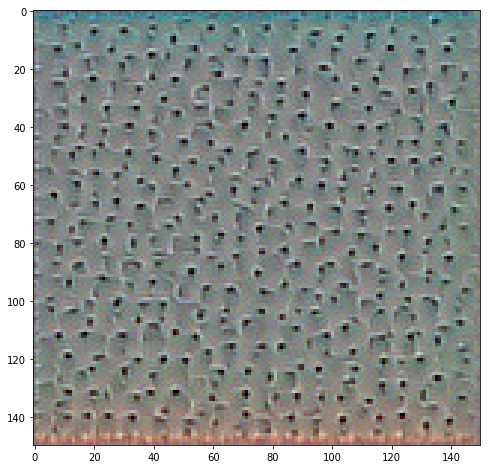

In [9]:
plt.figure(figsize = (8,8))
plt.imshow(gen_pattern('block3_conv1', 16), interpolation='nearest', aspect='auto');

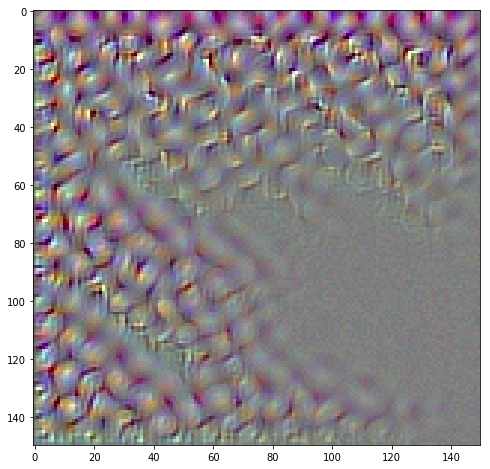

In [10]:
plt.figure(figsize = (8,8))
plt.imshow(gen_pattern('block3_conv2', 0), interpolation='nearest', aspect='auto');

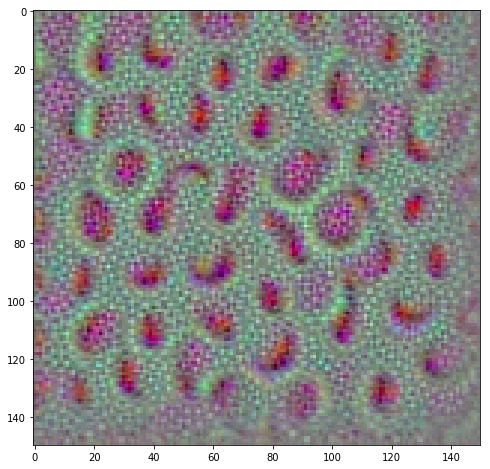

In [11]:
plt.figure(figsize = (8,8))
plt.imshow(gen_pattern('block4_conv1', 0), interpolation='nearest', aspect='auto');

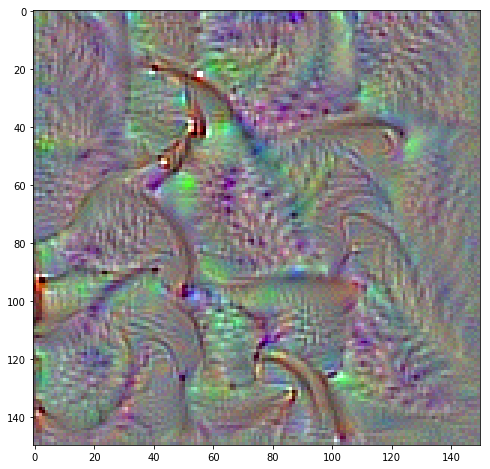

In [12]:
plt.figure(figsize = (8,8))
plt.imshow(gen_pattern('block5_conv1', 0), interpolation='nearest', aspect='auto');

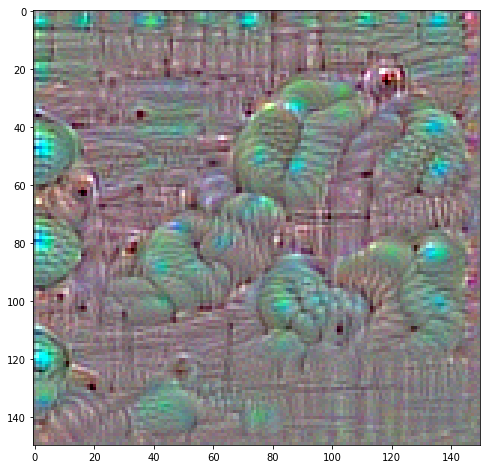

In [13]:
plt.figure(figsize = (8,8))
plt.imshow(gen_pattern('block5_conv1', 4), interpolation='nearest', aspect='auto');

The progression through the heirarchy of representations is obvious. 

In [14]:
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = gen_pattern('block1_conv1', i + (j*8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end= vertical_start + size
        results[horizontal_start:horizontal_end, vertical_start: vertical_end, :] = filter_img

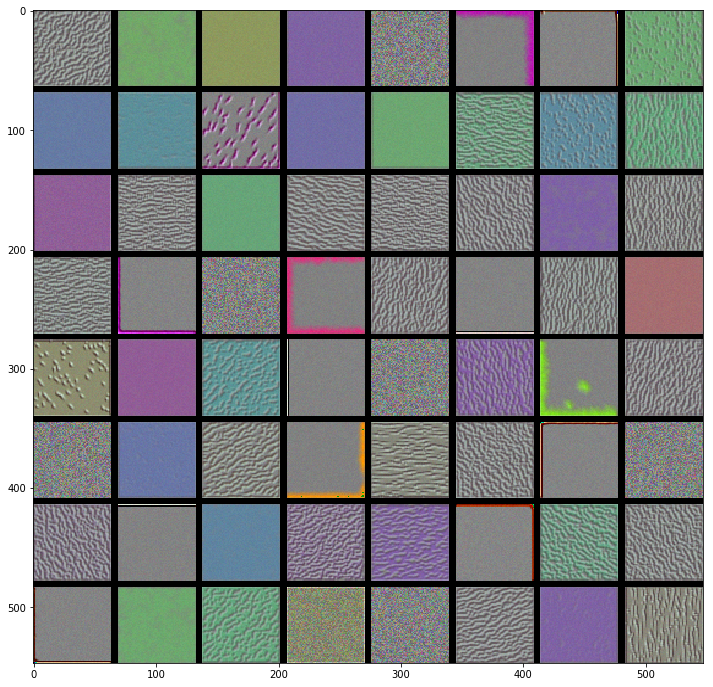

In [15]:
plt.figure(figsize = (12,12))
plt.imshow(results, interpolation='nearest', aspect='auto');

In [16]:
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = gen_pattern('block5_conv1', i + (j*8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end= vertical_start + size
        results[horizontal_start:horizontal_end, vertical_start: vertical_end, :] = filter_img

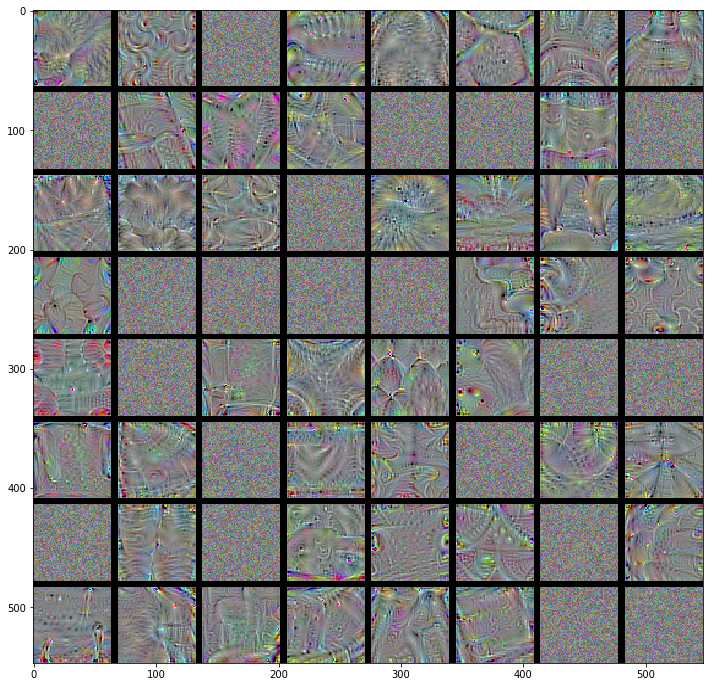

In [17]:
plt.figure(figsize = (12,12))
plt.imshow(results, interpolation='nearest', aspect='auto');